In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('dataset/custom/raw/sensor.csv')

총 6개의 broken data, broken이후 recovering중인 데이터, 정상데이터로 구성
'broken'은 각 타임스탬프에서 이상이 있다는것을 의미하며, 'recovering'은 현재 타임스텝에서 이상이 발생한 직후에 펌프를 이상으로 복구중임을 의미한다.이러한 값을 후에 각각 라벨인코딩(0,1,2)

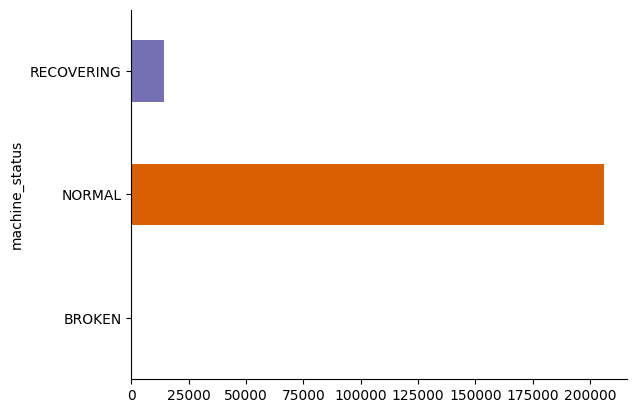

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('machine_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df['sensor_00'].isnull().sum()

np.int64(10208)

인덱스 제거

In [7]:
#index 제거
df.drop(df.columns[0], axis=1, inplace=True)

In [8]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [9]:
df.isnull().sum()

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

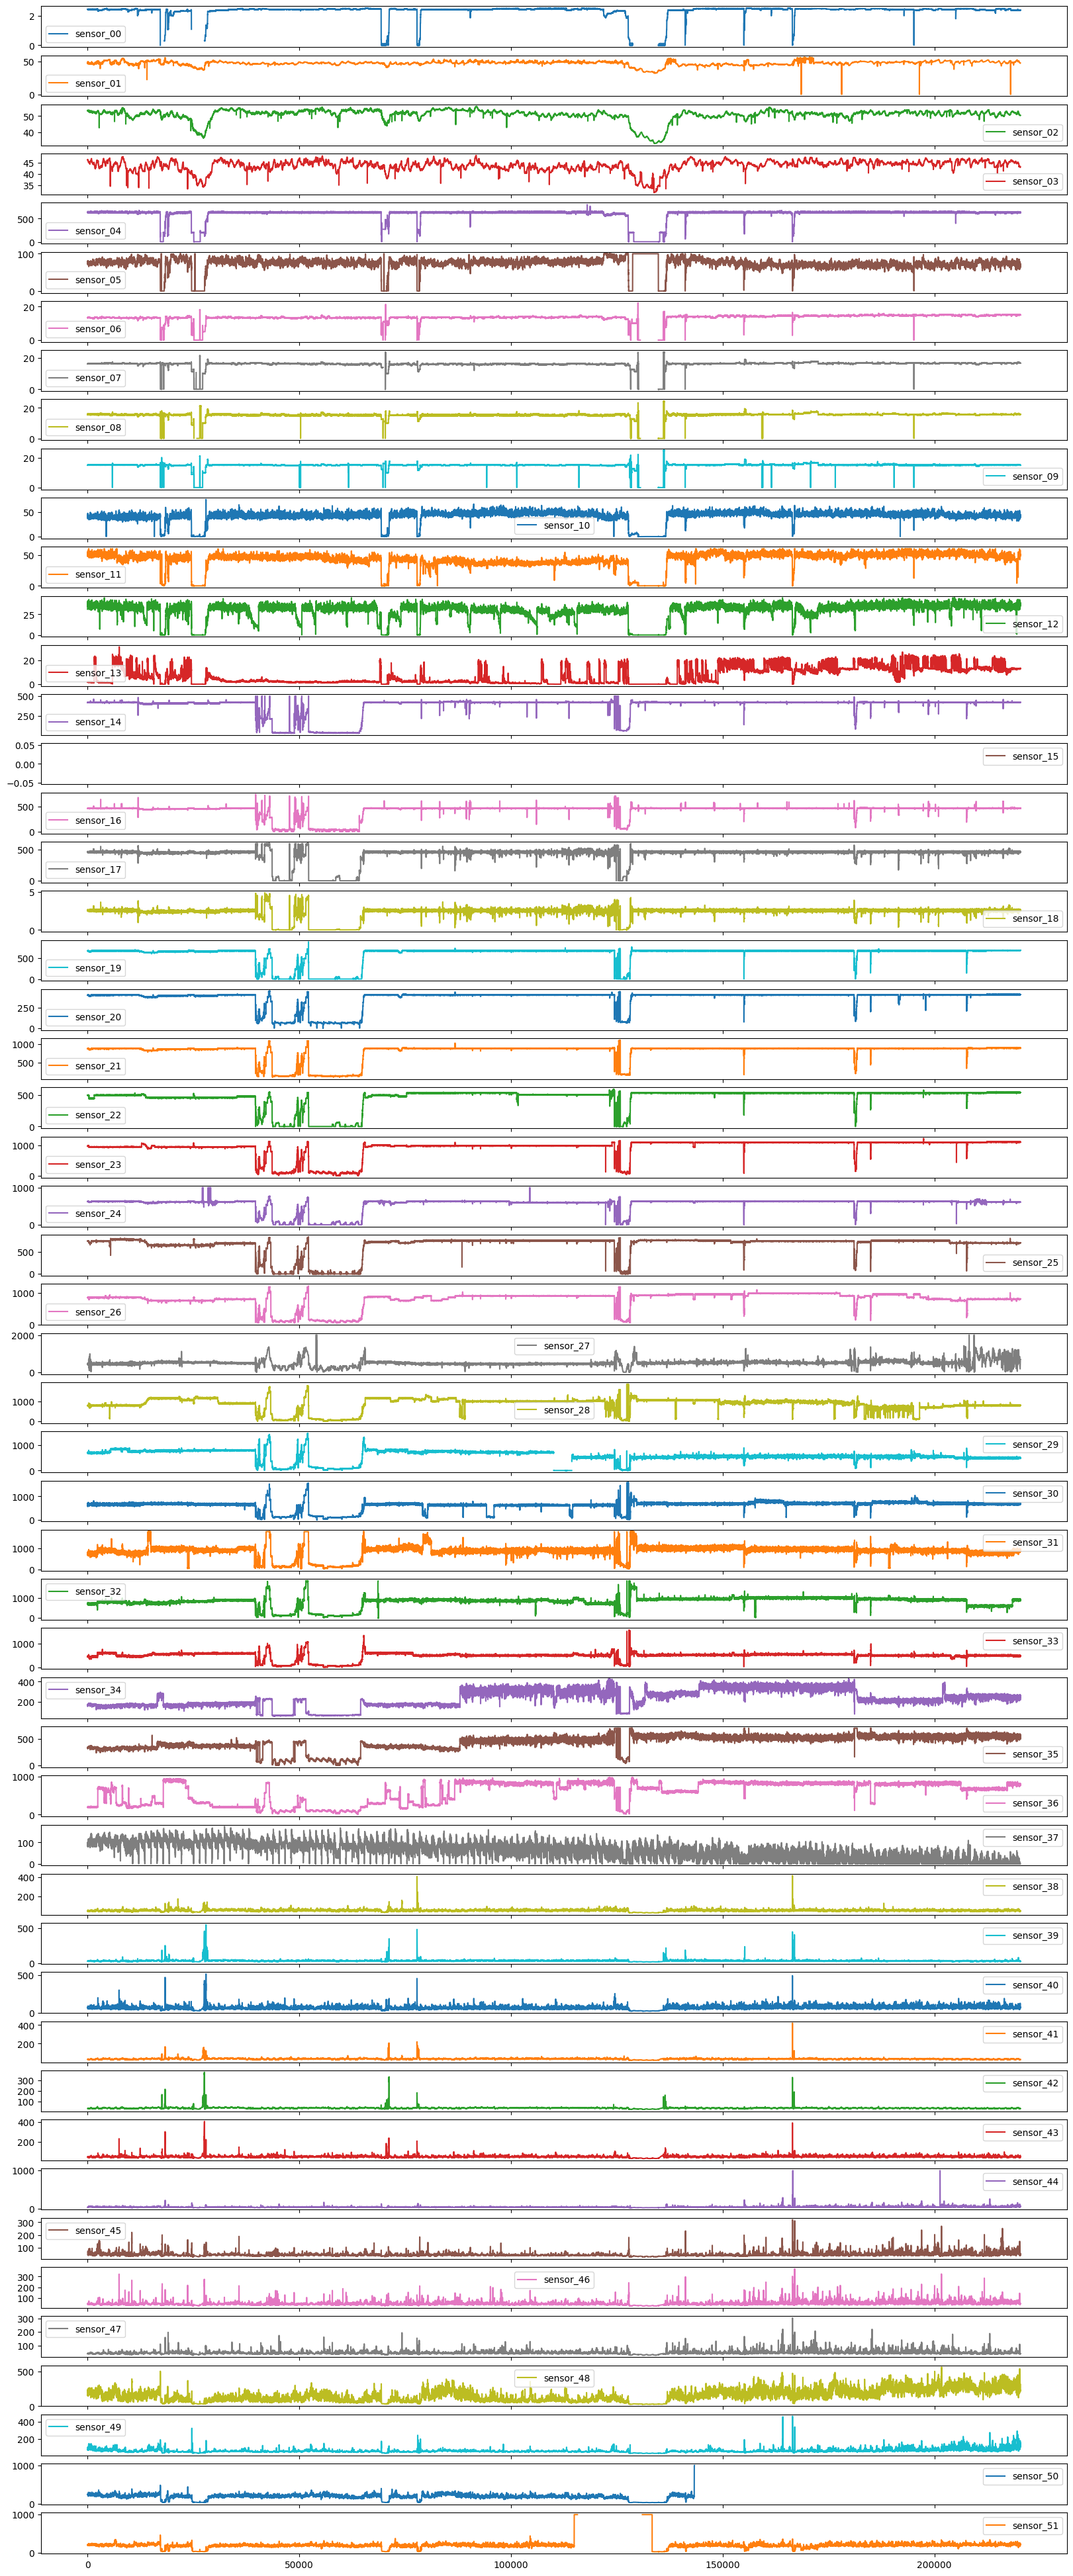

In [10]:
import matplotlib.pyplot as plt
df.plot(subplots =True, sharex = True, figsize = (20,50))

### periodic
- 비슷한 pattern을 보이는 sensor들이 존재
  - sensor (1,2,3)
  - (4,5,6,7,8,9),
  - (10,11,12),
  - (14,16,17,18),
  - (19,20,21,22,23,24),
  - (25,26,28,29,30,31,32,33),
  - (34,35),
  - (38,39,40,41,42,43,45,46,47).
- 비슷한 추세, pattern을 보이는 sensor들을 모델에다가 다 학습시키는게 나을까/ 아님 pca나 비슷한 pattern을 보이는 sensor column중 일부만 채택하여 모델에 학습시킬지

sensor15 column은 모든 행에 대해서 null값이므로 제거
- 추가 eda방법론으로는 data Null값이 10만개 이상인 컬럼을 제거하고 모델에 집어넣어도 될듯..? -> 이미 비슷한 pattern을 띄는센서컬럼이 많으므로

나머지 null값들은 시계열의 마지막값으로 채움(추가적으로 0값은 누락된 값이 아니라 센서 자체에서 0값을 반환하였다고 판단.)

In [11]:
df.drop(['sensor_15'], axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)

/var/folders/7l/048b5xzx7gg8w986ss14t67w0000gn/T/ipykernel_38776/4164025567.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


recovering : 2, broken : 1, Normal : 0 으로 라벨 인코딩

In [12]:
df.replace({'machine_status': {'RECOVERING': 2, 'BROKEN': 1, 'NORMAL': 0}}, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])

/var/folders/7l/048b5xzx7gg8w986ss14t67w0000gn/T/ipykernel_38776/3834238811.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'machine_status': {'RECOVERING': 2, 'BROKEN': 1, 'NORMAL': 0}}, inplace=True)


In [13]:
print('Start time: ', df['timestamp'].min())
print('End time: ', df['timestamp'].max())
print('Time difference: ', df['timestamp'].max()-df['timestamp'].min())

Start time:  2018-04-01 00:00:00
End time:  2018-08-31 23:59:00
Time difference:  152 days 23:59:00


'Normal' data는 파란색으로 'broken'data는 빨간색으로, 'recovering'data는 노란색으로 plotting (아래코드는 캐글에서 인용)

In [14]:
build_plots_full = False

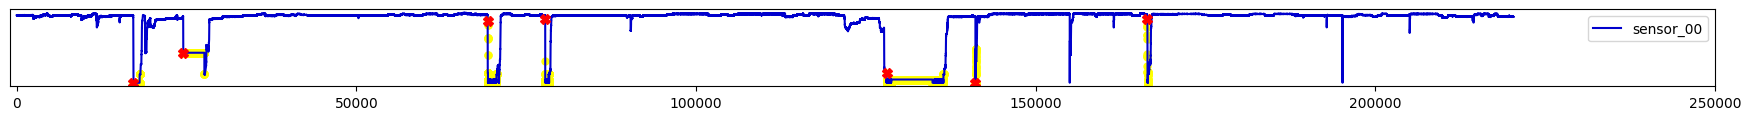

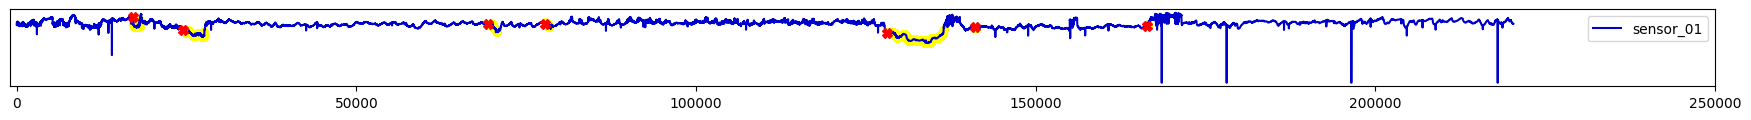

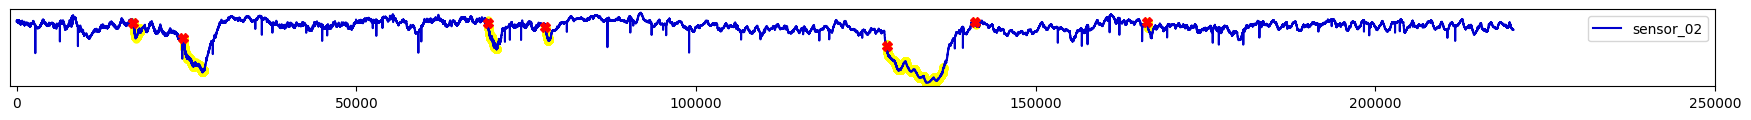

In [15]:
if build_plots_full:
    col_names = df.columns[1:-1]
else:
    col_names = df.columns[1:4]

for col_name in col_names:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(df[col_name].loc[df['machine_status'] == 2], linestyle='none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(df[col_name], color='mediumblue', label=col_name)
    plot = plt.plot(df[col_name].loc[df['machine_status'] == 1], linestyle='none', marker='X', color='red', markersize=7)
    plt.legend(loc='upper right')
    plt.xlim((-1000,250000))
    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_visible(False)
    plt.show()


In [16]:
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,1000.0000,231.1921,0
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,1000.0000,231.1921,0
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,1000.0000,232.0602,0
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,1000.0000,234.0856,0


In [17]:
# machine status == 2 or 1 인 경우 test
# machine status == 0 인 경우 train

train = df.loc[df['machine_status'] == 0]
test = df.loc[df['machine_status'] != 0]

In [18]:
train.to_csv("train.csv", index=False)

In [19]:
test.to_csv("test.csv", index=False)

In [ ]:
# train.to_pickle("dataset/custom/labeled/train/custom.pkl")
# test.to_pickle("dataset/custom/labeled/test/custom.pkl")

In [23]:
import pickle

import numpy as np

# Convert timestamp to Unix timestamp (numerical format)
train['timestamp'] = pd.to_datetime(train['timestamp']).astype(np.int64) // 10**9  # Convert to seconds
test['timestamp'] = pd.to_datetime(test['timestamp']).astype(np.int64) // 10**9

# Now convert to numpy arrays
train_array = train.values.astype(np.float32)
test_array = test.values.astype(np.float32)

# Save the numpy arrays
with open('dataset/custom/labeled/train/custom.pkl', 'wb') as f:
    pickle.dump(train_array, f)

with open('dataset/custom/labeled/test/custom.pkl', 'wb') as f:
    pickle.dump(test_array, f)

/var/folders/7l/048b5xzx7gg8w986ss14t67w0000gn/T/ipykernel_38776/257111201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['timestamp'] = pd.to_datetime(train['timestamp']).astype(np.int64) // 10**9  # Convert to seconds
/var/folders/7l/048b5xzx7gg8w986ss14t67w0000gn/T/ipykernel_38776/257111201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['timestamp'] = pd.to_datetime(test['timestamp']).astype(np.int64) // 10**9
